<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Code-/blob/main/Zerobase/05_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05. forecast(시계열 분석)

## 1. 배경 및 설치

In [ ]:
# 로컬 환경? visual c++ build tool부터 설치해야함
# https://go.microsoft.com/fwlink/?LinkId=691126
# conda install pandas-datareader
# conda install -c conda-forge fbprophet


In [1]:
pip install fbprophet

In [2]:
from pandas_datareader import data
from fbprophet import Prophet 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 함수의 나쁜 예(인자가 많을때)
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
                                     #얼마나 잘게? #언제부터? #바이어스?
  """
  plot sine wave
  y = a sin(2 pi ft + t_0) + b
  """
  time = np.arange(startTime, endTime, sampleTime) # 시작~끝까지 샘플 간격으로
  result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

  plt.figure(figsize = (12,6))
  plt.plot(time, result)
  plt.grid(True)
  plt.xlabel('time')
  plt.ylabel('sin')
  plt.title(
      str(amp) + "*sin(2*pi*" + str(freq) + "*t" + str(startTime) + ")" + str(bias)
  )
  plt.show()

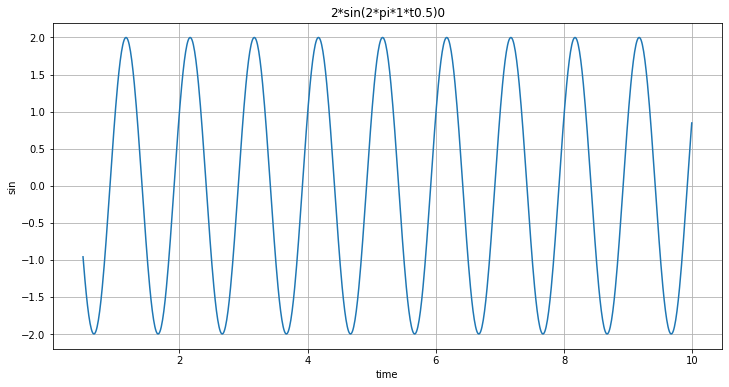

In [5]:
plotSinWave(2, 1, 10, 0.01 , 0.5, 0)

In [6]:
# 함수의 좋은 예(인자가 많을때)
def plotSinWave2(**kwargs): # keyworded arguments
                                     #얼마나 잘게? #언제부터? #바이어스?
  """
  plot sine wave
  y = a sin(2 pi ft + t_0) + b
  """
  endTime = kwargs.get("endTime", 1) # 코드의미? => 사용자가 endtime을 지정했다면 그값쓰고, 안썼다면 1을 써라(default)
  sampleTime = kwargs.get("sampleTime", 0.01) # sampelTime지정했다면 그값을, 안썼다면 0.01을 써라
  amp = kwargs.get("amp",1)
  freq = kwargs.get("freq",1)
  startTime = kwargs.get("startTime",0)
  bias = kwargs.get("bias",0)
  figsize = kwargs.get("figsize",(12,6))

  time = np.arange(startTime, endTime, sampleTime) # 시작~끝까지 샘플 간격으로
  result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

  plt.figure(figsize = (12,6))
  plt.plot(time, result)
  plt.grid(True)
  plt.xlabel('time')
  plt.ylabel('sin')
  plt.title(
      str(amp) + "*sin(2*pi*" + str(freq) + "*t" + str(startTime) + ")" + str(bias)
  )
  plt.show()

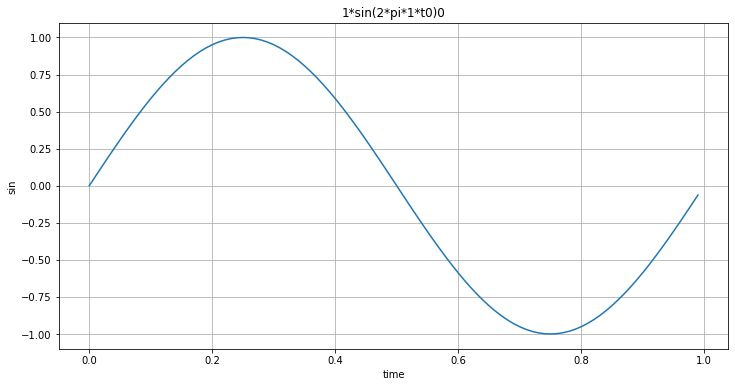

In [7]:
plotSinWave2()

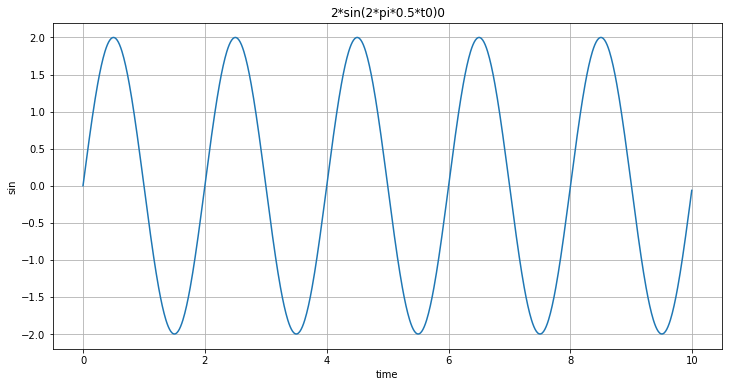

In [8]:
plotSinWave2(amp=2, freq=0.5, endTime=10)

### fbprophet 사용

In [9]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=6ea876ad43a634cce977a8f2c9178ddfb0e334c89690fd5df1d0841a67e0c0dd
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [10]:
import pyforest

In [11]:
time = np.linspace(0,1, 365*2) # 0부터 1까지 730등분으로 나누었음 (총 730개)
result = np.sin(2*np.pi*12*time) # 2년간의 data인데 sin 특성을 가졌다~
ds = pd.date_range('2017-01-01', periods = 365*2, freq='D') # 주기:Day(일)
df = pd.DataFrame({'ds':ds, 'y':result}) 
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


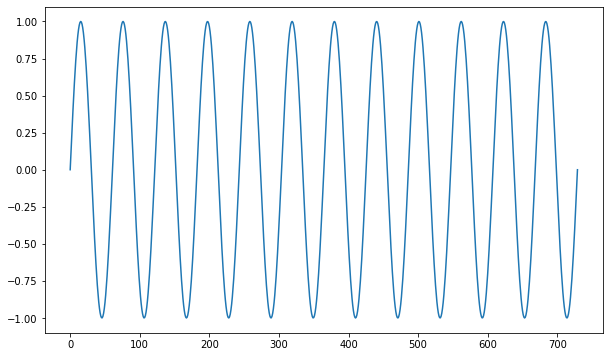

In [12]:
df["y"].plot(figsize=(10,6)); # ;을 붙이면 <plot axes ... > 메세지창이 안뜸

In [13]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리 dataframe을 학습해서 그 내용을 m에 저장했음

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [14]:
future = m.make_future_dataframe(periods=30) # 30일을 예측해봐라
forecast = m.predict(future)

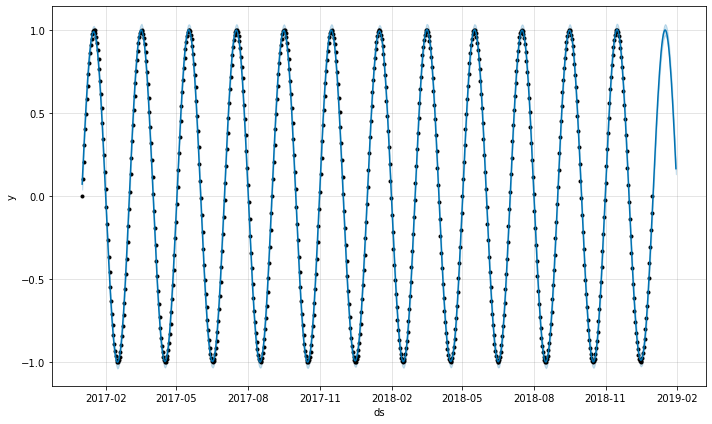

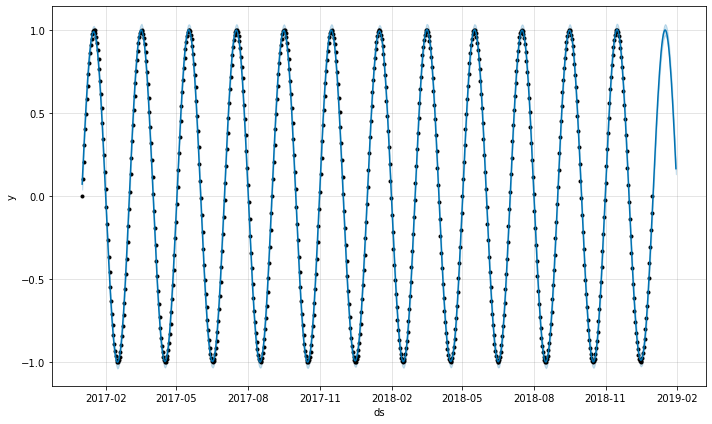

In [15]:
m.plot(forecast) # 뒤의 부분이 예측한 데이터

> 살짝 변형 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

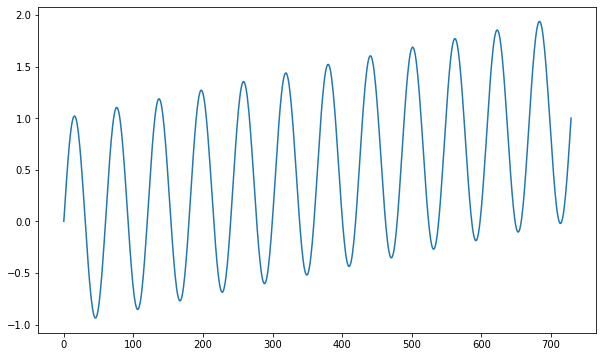

In [16]:
time = np.linspace(0,1, 365*2) # 0부터 1까지 730등분으로 나누었음 (총 730개)
result = np.sin(2*np.pi*12*time) + time # 2년간의 data인데 sin 특성을 가졌다~

ds = pd.date_range('2017-01-01', periods = 365*2, freq='D') # 주기:Day(일)
df = pd.DataFrame({'ds':ds, 'y':result}) 

df["y"].plot(figsize=(10,6)) # 적당히 추세가 있는 data 생성

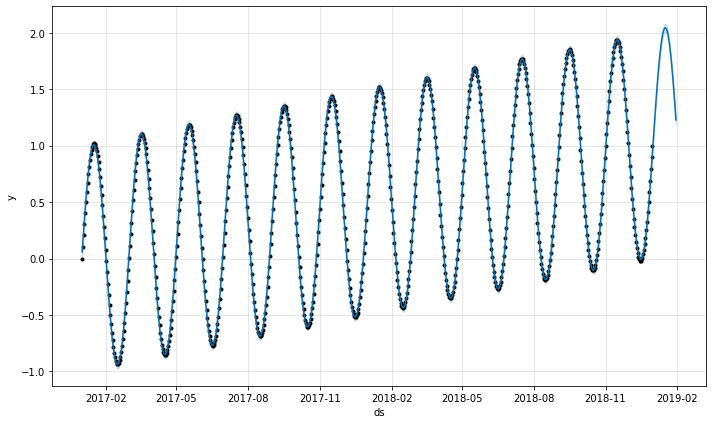

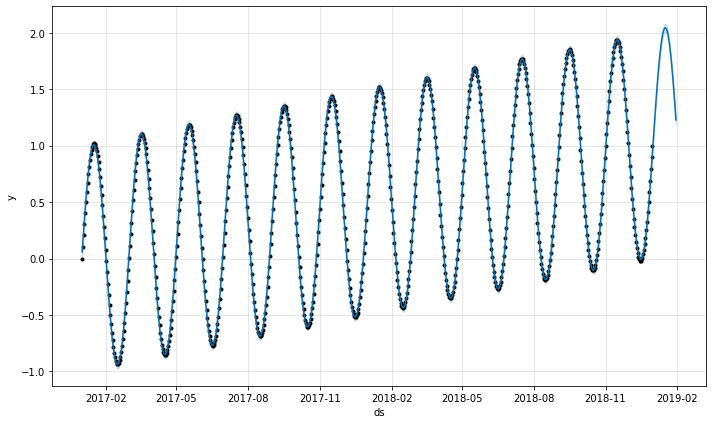

In [17]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

> 난수 추가 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

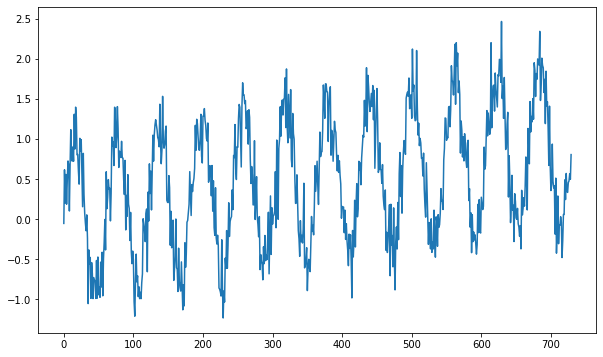

In [18]:
time = np.linspace(0,1, 365*2) # 0부터 1까지 730등분으로 나누었음 (총 730개)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4 # 

ds = pd.date_range('2017-01-01', periods = 365*2, freq='D') # 주기:Day(일)
df = pd.DataFrame({'ds':ds, 'y':result}) 

df["y"].plot(figsize=(10,6)) # 적당히 추세가 있는 data 생성

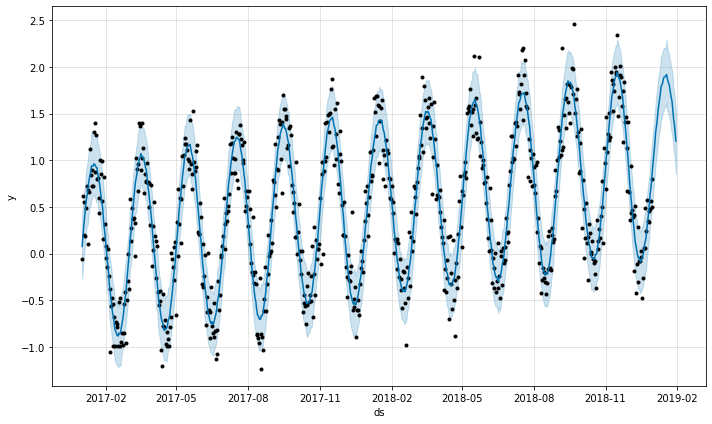

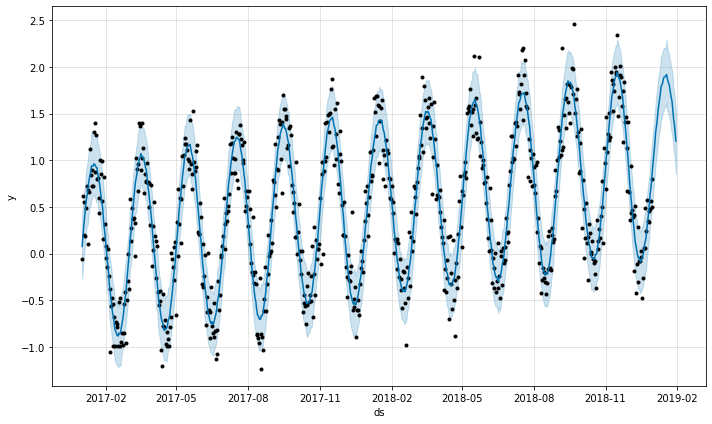

In [19]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

## 시계열 데이터 실전 이용해보기 

In [25]:
pinkwink_web = pd.read_csv('/content/05_PinkWink_Web_Traffic.csv',encoding='utf-8',thousands=',',names=['date','hit'],index_col=0)
pinkwink_web

<IPython.core.display.Javascript object>

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0


In [32]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()] # null값 하나 있는거 제거
pinkwink_web.info() # 365개로, 하나가 줄었음.

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


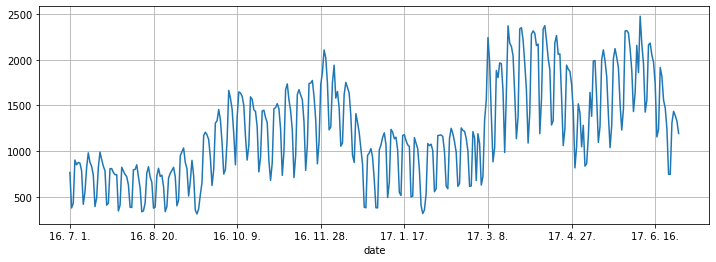

In [33]:
# 전체 데이터 그려보기
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [36]:
# trend 분석을 시각화하기 위한 x축 값 만들기
# len(pinkwink_web) = 365
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000) # 0~364 사이를 1000등분

In [48]:
# 에러를 계산할 함수
def error(f, x ,y):
  return np.sqrt(np.mean((f(x)-y)**2))

In [46]:
fp1 = np.polyfit(time,traffic,1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time,traffic,2) # 2차원
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time,traffic,3) # 3차원
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time,traffic,15) # 15차원
f15 = np.poly1d(fp15)

In [49]:
print(error(f1,time,traffic))
print(error(f2,time,traffic))
print(error(f3,time,traffic))
print(error(f15,time,traffic))

430.8597308110963
430.62841018946943
429.53280466762925
330.4777304836984


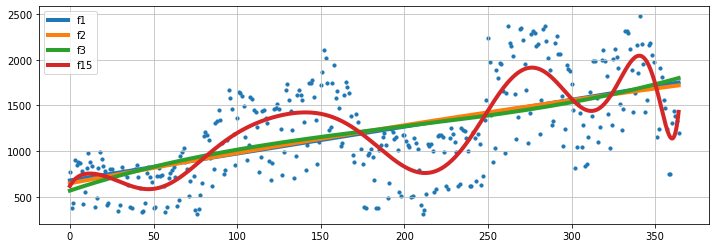

In [50]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)
# lw:라인 와이드
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [54]:
# ds에 날짜형식으로 들어감.(index의 값들)
df = pd.DataFrame({"ds":pinkwink_web.index, "y":pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format = "%y. %m. %d.")
del df["date"]
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [57]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [58]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [60]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다.
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower",'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,905.470470,699.266282,1126.652980
421,2017-08-26,490.545920,263.978260,716.834837
422,2017-08-27,623.104992,411.148430,834.602148
423,2017-08-28,1175.626329,965.393218,1387.030744
424,2017-08-29,1211.572042,1005.721641,1408.886077


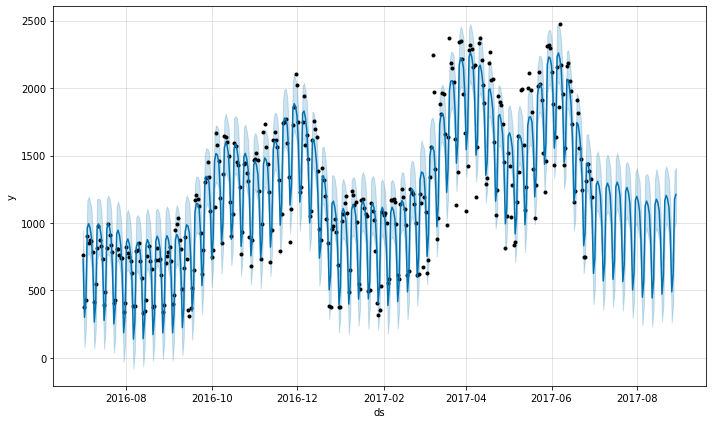

In [62]:
m.plot(forecast);

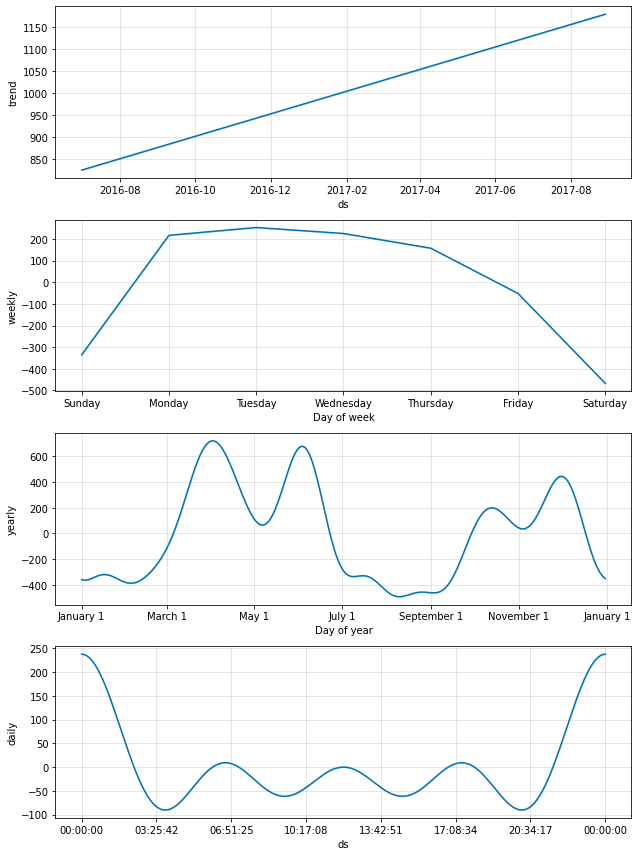

In [64]:
m.plot_components(forecast);

## fbprophet으로 주가 분석하기 